In [37]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Getting abusive words from user
abusive_word_dict = ['dog', 'pig']  # Example list of abusive words which user don't want in their post

# Function to perform sentiment analysis using NL toolkit
def perform_sentiment_analysis(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)['compound']
    return sentiment_score

# Function to check if text contains abusive words
def abusive_words_check(text, abusive_word_dict):
    text = text.lower()

    # Checking for abusive words
    for abusive_word in abusive_word_dict:
        if abusive_word in text:
            return True

    return False

# Example input data as a dictionary
text_data = {"text": ["You look happy", "I am sad", "You look like a dog", "You are having a joyful life",
                      "I don't have any comment on this post", "This place is beautiful"]}

# Convert input data to a pandas daaframe
#In future, user can input their comments on the post via csv which is then converted into pandas dataframe
df = pd.DataFrame(text_data)

# Initialise categorised_text_data list
categorised_text_data = []
Abuse = Negative = Positive = Neutral = 0
Abusive_score = Negative_score = Positive_score = Neutral_score = 0

# Loop through each text in the DataFrame
for index, row in df.iterrows():
    text = row['text']
    # Perform sentiment analysis on text to get sentiment score
    sentiment_score = perform_sentiment_analysis(text)

    # Check if text contains abusive words
    if abusive_words_check(text, abusive_word_dict):
        # categorise as abusive comments
        category = "Abusive"
        Abuse += 1
        Abusive_score = Abusive_score+sentiment_score
    else:
        # Check sentiment score of the comments to categorise as positive, negative, or neutral comments
        if sentiment_score > 0:
            category = "Positive Comment"
            Positive += 1
            Positive_score = Positive_score + sentiment_score
        elif sentiment_score < 0:
            category = "Negative Comment"
            Negative += 1
            Negative_score= Negative_score + sentiment_score
        else:
            category = "Neutral Comment"
            Neutral += 1
            Neutral_score= Neutral_score + sentiment_score

    # Append text, category, and sentiment score as tuple to categorised_text_data
    categorised_text_data.append((text, category, sentiment_score))
    Overall_sentiment_score = Abusive_score + Negative_score + Positive_score + Neutral_score

# Printing Individual Comment category and score
for text, category, sentiment_score in categorised_text_data:
    print(f"Text: {text}\nCategory: {category}")
    print("Sentiment score: ", sentiment_score, "\n")

print("Overall Analysis: \n")
print(" Abusive Comments =", Abuse,"\n")
print(" Positive Comments =", Positive,"\n")
print(" Negative Comments =", Negative,"\n")
print(" Neutral Comments =", Neutral,"\n")

print("Overall Abusive Percentage = ", (Abuse / len(df)) * 100, "%")
print("Overall Abusive score = ",Abusive_score/Overall_sentiment_score ,"\n")
print("Overall Positive Percentage = ", (Positive / len(df)) * 100, "%")


Text: You look happy
Category: Positive Comment
Sentiment score:  0.5719 

Text: I am sad
Category: Negative Comment
Sentiment score:  -0.4767 

Text: You look like a dog
Category: Abusive
Sentiment score:  0.3612 

Text: You are having a joyful life
Category: Positive Comment
Sentiment score:  0.5994 

Text: I don't have any comment on this post
Category: Neutral Comment
Sentiment score:  0.0 

Text: This place is beautiful
Category: Positive Comment
Sentiment score:  0.5994 

Overall Analysis: 

 Abusive Comments = 1 

 Positive Comments = 3 

 Negative Comments = 1 

 Neutral Comments = 1 

Overall Abusive Percentage =  16.666666666666664 %
Overall Abusive score =  0.2182213629772837 

Overall Positive Percentage =  50.0 %


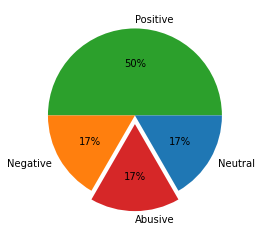

In [34]:
import matplotlib.pyplot as plt
import seaborn

# declaring data
data = [Positive, Negative, Abuse, Neutral]
keys = ['Positive', 'Negative', 'Abusive', 'Neutral']

# declaring exploding pie
explode = [0, 0, 0.1, 0]
# define Seaborn color palette to use
palette_color = seaborn.color_palette(['#2ca02c', '#ff7f0e', '#d62728', '#1f77b4'])

# setting white background
plt.rcParams['figure.facecolor'] = 'white'

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, 
		explode=explode, autopct='%.0f%%')


# displaying chart
plt.show()
